<a href="https://colab.research.google.com/github/pony-yyy/GroupWork/blob/main/Restaurant_in_IN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [42]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [43]:
# Query all data from the table
query = f"""
  SELECT
  b.business_id,
  t.text AS review
FROM
  `{project_id}.{dataset_name}.All_data_cleaned` b
INNER JOIN
  `{project_id}.{dataset_name}.restaurant_tips` t
ON
  b.business_id = t.business_id
WHERE
  b.state = 'IN';

"""

query_job = bigquery_client.query(query)
results = query_job.result()

reviewInPa_df = query_job.to_dataframe()
reviewInPa_df

,business_id,review
0,UFCN0bYdHroPKu6KV5CJqg,Best lunch/ happy hour in downtown!!! Kenny ro...
1,UFCN0bYdHroPKu6KV5CJqg,Only order grits if you like Spicey!
2,UFCN0bYdHroPKu6KV5CJqg,Two words. Chicken sandwich.
3,UFCN0bYdHroPKu6KV5CJqg,The spicy honey and chicken combo is amazing ....
4,UFCN0bYdHroPKu6KV5CJqg,Get the Mac and cheese!
...,...,...
50175,0vIQ0onrTtDtZfG2otTsng,Great food and very good service!
50176,Xv5rxZGfOQvhJHhsBLjW-Q,Make reservations or plan to go early before t...
50177,y0yNkl8URS8hUeRUkjvbUw,This food is good asf and the habachi guy is g...
50178,2DsplH_vy4GCcEnVpn0AbA,mahi sandw ask for hot mustard


In [44]:
import pandas as pd
from textblob import TextBlob
import numpy as np

target_column = 'review'

reviewInPa_df['Polarity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
reviewInPa_df['Subjectivity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.subjectivity)

reviewInPa_df['Sentiment'] = np.where(reviewInPa_df['Polarity'] > 0, 'Positive', np.where(reviewInPa_df['Polarity'] < 0, 'Negative', 'Neutral'))

reviewInPa_df

,business_id,review,Polarity,Subjectivity,Sentiment
0,UFCN0bYdHroPKu6KV5CJqg,Best lunch/ happy hour in downtown!!! Kenny ro...,1.0000,0.6500,Positive
1,UFCN0bYdHroPKu6KV5CJqg,Only order grits if you like Spicey!,0.0000,1.0000,Neutral
2,UFCN0bYdHroPKu6KV5CJqg,Two words. Chicken sandwich.,-0.6000,0.9500,Negative
3,UFCN0bYdHroPKu6KV5CJqg,The spicy honey and chicken combo is amazing ....,-0.1000,0.7500,Negative
4,UFCN0bYdHroPKu6KV5CJqg,Get the Mac and cheese!,0.0000,0.0000,Neutral
...,...,...,...,...,...
50175,0vIQ0onrTtDtZfG2otTsng,Great food and very good service!,0.9000,0.7650,Positive
50176,Xv5rxZGfOQvhJHhsBLjW-Q,Make reservations or plan to go early before t...,0.1000,0.3000,Positive
50177,y0yNkl8URS8hUeRUkjvbUw,This food is good asf and the habachi guy is g...,0.7000,0.6000,Positive
50178,2DsplH_vy4GCcEnVpn0AbA,mahi sandw ask for hot mustard,0.2500,0.8500,Positive


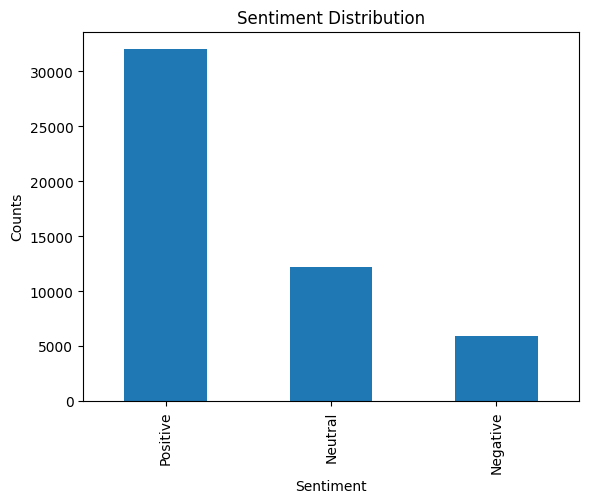

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = reviewInPa_df['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [46]:
positive_reviews = reviewInPa_df[reviewInPa_df['Sentiment'] == 'Positive']

positive_review_counts = positive_reviews.groupby('business_id').size()

top_10_positive_businesses = positive_review_counts.sort_values(ascending=False).head(10)

print(top_10_positive_businesses)

business_id
8yR12PNSMo6FBYx1u5KPlw    156
UFCN0bYdHroPKu6KV5CJqg    155
ReV4Q3rEJ8neicQPc6pC0w    134
aREOVt958pzJsuNmX1-LUQ    127
mSQ6nIPfqviBF8xIuhsJ7A    123
S_jfDqc2TUhkraTpeZgqjg    122
NTiPDvC99_yK0RY9ltnLgQ    118
ipZ7neK1bjBAUrCqyCvB_Q    117
Xm3fazqrD-Fi4tVPlc4i6Q    116
U_hgCCf3CZs1no_BYXU8zg    115
dtype: int64


In [47]:
top_10_positive_businesses_df = top_10_positive_businesses.reset_index()
top_10_positive_businesses_df.columns = ['business_id', 'positive_review_count']

print(top_10_positive_businesses_df)

              business_id  positive_review_count
0  8yR12PNSMo6FBYx1u5KPlw                    156
1  UFCN0bYdHroPKu6KV5CJqg                    155
2  ReV4Q3rEJ8neicQPc6pC0w                    134
3  aREOVt958pzJsuNmX1-LUQ                    127
4  mSQ6nIPfqviBF8xIuhsJ7A                    123
5  S_jfDqc2TUhkraTpeZgqjg                    122
6  NTiPDvC99_yK0RY9ltnLgQ                    118
7  ipZ7neK1bjBAUrCqyCvB_Q                    117
8  Xm3fazqrD-Fi4tVPlc4i6Q                    116
9  U_hgCCf3CZs1no_BYXU8zg                    115


In [48]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

# Query all data from the table
query = f"""
   SELECT business_id,categories
   FROM `{project_id}.{dataset_name}.{table_name}`;

"""

query_job = bigquery_client.query(query)
results = query_job.result()

categories_df = query_job.to_dataframe()
categories_df

,business_id,categories
0,kfNv-JZpuN6TVNSO6hHdkw,"Steakhouses, Asian Fusion, Restaurants"
1,sqSqqLy0sN8n2IZrAbzidQ,"Pizza, Chicken Wings, Sandwiches, Restaurants"
2,RK6-cJ9hj53RzOlCBmpT-g,"Restaurants, Italian, Food Trucks, Food"
3,EuRGgOwJ0g1vTj2R04j37Q,"Seafood, Restaurants"
4,pmuuoDqNZp7518AUd-YmPA,"Restaurants, Bakeries, Caterers, Bagels, Food,..."
...,...,...
52281,xThXwInJdMTI2yhgY3Uwyw,"Restaurants, Mexican"
52282,QKB21Alitgj-m6oEoFZFBw,"Restaurants, Mexican"
52283,4D19uG4enigRAsvTVmn61g,"Restaurants, Mexican"
52284,HUJLxKMVmUvreA-07qUitg,"Restaurants, Mexican"


In [49]:
categories_in_top_10_businesses = pd.merge(top_10_positive_businesses_df, categories_df, on='business_id', how='inner')
categories_in_top_10_businesses

,business_id,positive_review_count,categories
0,8yR12PNSMo6FBYx1u5KPlw,156,"Restaurants, Gluten-Free, Bars, Food, Nightlif..."
1,UFCN0bYdHroPKu6KV5CJqg,155,"Nightlife, Comfort Food, Restaurants, American..."
2,ReV4Q3rEJ8neicQPc6pC0w,134,"Steakhouses, Seafood, Restaurants, Bars, Cockt..."
3,aREOVt958pzJsuNmX1-LUQ,127,"American (New), Nightlife, Restaurants, Bars, ..."
4,mSQ6nIPfqviBF8xIuhsJ7A,123,"Mexican, Restaurants"
5,S_jfDqc2TUhkraTpeZgqjg,122,"Bars, Mexican, Nightlife, Cocktail Bars, Resta..."
6,NTiPDvC99_yK0RY9ltnLgQ,118,"Sports Bars, Arts & Entertainment, Restaurants..."
7,ipZ7neK1bjBAUrCqyCvB_Q,117,"Food, Sandwiches, American (New), Restaurants,..."
8,Xm3fazqrD-Fi4tVPlc4i6Q,116,"Sandwiches, Cajun/Creole, Specialty Food, Food..."
9,U_hgCCf3CZs1no_BYXU8zg,115,"Beer, Wine & Spirits, Food, Nightlife, America..."


In [50]:
pip install wordcloud

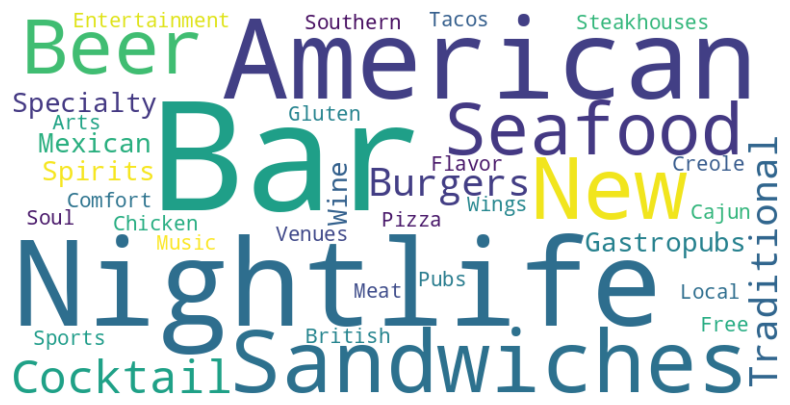

In [51]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(category for category in categories_in_top_10_businesses['categories'])

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Restaurants', 'Food', 'Restaurant',"&","Markets","Shops"])


cleaned_words = [word for word in text.split() if word not in custom_stopwords]

word_counts = Counter(cleaned_words)

sorted_words = word_counts.most_common()

# for word, count in sorted_words:
#     print(f"{word}: {count}")

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
